## Introduction to Sympy

What if you would like to perform some calculus alongside your other computations? For that. you would need a computer algebra system (CAS). Luckily, the sympy package can provide you with the tools to perform symbolic computations and then can help you numerically evaluate those results.

Let's get started...

In [1]:
# Typical import for numpy
# We will use a utility function or two for now...
import numpy as np

In [2]:
#Typical import for Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import sympy tools
from sympy import *
init_printing(use_latex=True)

Note that I imported sympy, but then also initialized the sympy printing facilities to utilize \LaTeX. The reason for this will be obvious soon, if you haven't already figured it out.

Rather than have x be a vector, I need it to be a symbol. In particular, I need it to be a symbol that one would like to manipulate similar to how one uses symbols in mathematical expressions. Unlike variables which point to specific data structures, a symbol is more like how a variable is used in mathematics, and can take on values at a later time.

In [4]:
# Make x a symbol
x = symbols('x')

In [5]:
# Let's write an expression
y = cos(x)

In [6]:
# Just provide the expression by itself,
# and it will be printed with LaTeX!
y

So, you can define mathematical expressions in sympy, and they will be rendered using \LaTeX.

Additionally, we can perform symbolic math on that expression. For example, let's take the derivative with respect to x using the `diff()` function.

In [7]:
dydx = y.diff(x)

In [8]:
dydx

Now we have the derivative of the function with respect to x, and have solved it symbolically using sympy! Sympy has it's own matplotlib functions for plotting expressions as well...

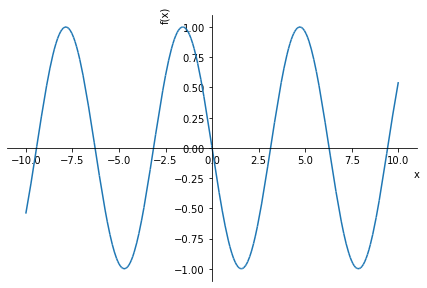

In [9]:
plot(dydx)

However, we may want more control over the sampling and plot itself. This can sometimes be better done by evaluating the function _numerically_ instead. Let's do that now...

In [10]:
x_vals = np.linspace(-2*np.pi,2*np.pi,101)
y_vals = np.array([dydx.evalf(subs=dict(x=x_val)) for x_val in x_vals])
print('The length of x is %d'%(len(x_vals)))
print('The length of y is %d'%(len(y_vals)))

The length of x is 101
The length of y is 101


Here we have used a python list comprehension to evaluate our derivative (dydx) at each of the 101 points in the $-2\pi$ to $2\pi$ range created by `linspace()`. The `evalf()` function allows us plug in values for our symbols. In particular, we pass the subs= argument a python dictionary object which contains a mapping from a symbol to a particular value we would like to associate with that symbol. Multiple symbols can be passed into the function using the dictionary object, so that functions with more than one symbol can be evaluated numerically.

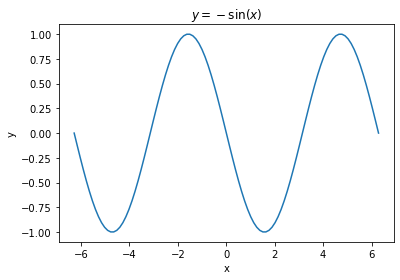

In [11]:
plt.plot(x_vals,y_vals)
plt.title('$y=%s$'%(latex(dydx)))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

You can also now see how the `latex()` function can be used to convert the expression we were storing in dydx into a string form recognized by \LaTeX math mode, and therefore the `title()` function from matplotlib. It's usually much easier to control how you want your plots to look using numerical evaluation instead of using sympy's built-in plotting tools, so keep that in mind in the future.